<a href="https://www.kaggle.com/code/dilekankaya/feature-engineering-diabetes-dataset?scriptVersionId=186268996" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Defining The Problem
Predicting whether people have diabetes when their characteristics are specified
It is desired to develop a machine learning model that can develop a machine learning model. The model
the data analysis and feature engineering steps required before development.
you are expected to realise.



---

# Dataset Story
This dataset is part of a large dataset held at the 
National Institute of Diabetes and Digestive and Kidney
Diseases in the United States. The data are used for a diabetes 
research study involving Pima Indian women living in Phoenix, the fifth
largest city in the state of Arizona, USA. These women are all aged 21 years or older. 
The target variable 'outcome' is indicated as 1 if the diabetes test result is positive, 
and 0 if it is negative.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import f1_score, mean_squared_error

from sklearn.impute import SimpleImputer, KNNImputer

import warnings
warnings.filterwarnings("ignore")



# 1. Importing Libraries:
   - `numpy` and `pandas`: Essential libraries for numerical computations and data manipulation.
   - `seaborn` and `matplotlib.pyplot`: Used for data visualization.
   - `missingno`: Utilized to visualize missing data.
   - `scipy.stats`: A library used for statistical tests and analyses.

# 2.Importing Functions and Classes from Sklearn:
   - Metrics (`accuracy_score`, `precision_score`, `recall_score`, `f1_score`, `roc_auc_score`, `classification_report`): Various metrics used to assess model performance.
   - `train_test_split`: Splits the dataset into training and testing sets.
   - `LabelEncoder`, `StandardScaler`: Preprocessing tools used for converting categorical data to numeric and for feature scaling.
   - `RandomForestClassifier`: A classification model using the random forest algorithm.
   - `KNNImputer`: An imputer that uses the K-Nearest Neighbors method to fill in missing data.

# 3. Suppressing Warnings:
   - `warnings`: Used to control warning messages in Python. The command `warnings.filterwarnings("ignore")` is used to disregard warning messages that may appear during code execution.



# Function Definition (def load()): *This defines a function called load.*
Reading the CSV (pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")): Inside the function, the pandas library’s read_csv function is used to read the CSV file containing the dataset. The path provided is where the file is stored on Kaggle.
Returning Data (return data): After loading the data, it is returned by the function.
After defining the function, the code then calls this load() function and stores the returned DataFrame in a variable named df. The last line of the code, df.head(), displays the first five rows of the DataFrame. This is typically used to quickly inspect the top rows of the dataset to understand its structure and the type of data it contains.

In [2]:
def load():
    data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes.csv")
    return data

df = load()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
import pandas as pd

def check_df(data, head=5):
  
    print("##################### Shape #####################")
    print(data.shape)
    
    print("##################### Types #####################")
    print(data.dtypes)
    
    print("##################### Duplicated Values #####################")
    print(data.duplicated().sum())
    
    print("##################### Missing Values #####################")
    print(data.isnull().sum())
    
    print("##################### Number of Unique Values #####################")
    print(data.nunique())
  
    print("##################### Head #####################")
    print(data.head(head))


check_df(df)

df.describe([0,0.05 ,0.25, 0.50 , 0.75 , 0.95, 1]).T







##################### Shape #####################
(768, 9)
##################### Types #####################
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
##################### Duplicated Values #####################
0
##################### Missing Values #####################
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
##################### Number of Unique Values #####################
Pregnancies                  17
Glucose                     136
BloodPressure  

,count,mean,std,min,0%,5%,25%,50%,75%,95%,100%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,0.00000,1.00000,3.0000,6.00000,10.00000,17.00,17.00
Glucose,768.0,120.894531,31.972618,0.000,0.000,79.00000,99.00000,117.0000,140.25000,181.00000,199.00,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,0.000,38.70000,62.00000,72.0000,80.00000,90.00000,122.00,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,0.00000,23.0000,32.00000,44.00000,99.00,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,0.00000,30.5000,127.25000,293.00000,846.00,846.00
BMI,768.0,31.992578,7.884160,0.000,0.000,21.80000,27.30000,32.0000,36.60000,44.39500,67.10,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.078,0.14035,0.24375,0.3725,0.62625,1.13285,2.42,2.42
Age,768.0,33.240885,11.760232,21.000,21.000,21.00000,24.00000,29.0000,41.00000,58.00000,81.00,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.00000,0.0000,1.00000,1.00000,1.00,1.00


# Categorize variables


In [4]:
    
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O" and col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat : {len(num_but_cat)}")
    print(f"cat_cols : {cat_cols}")
    print(f"num_cols : {num_cols}")
    print(f"cat_but_car : {cat_but_car}")
    
    return cat_cols, num_cols, cat_but_car

grab_col_names(df)

cat_cols, num_cols, cat_but_car = grab_col_names(df)
print("#############")
print(f"Cat_Cols : {cat_cols}")
print("#############")
print(f"Num_Cols : {num_cols}")
print("#############")
print(f"Cat_But_Car : {cat_but_car}")
    

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat : 1
cat_cols : ['Outcome']
num_cols : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cat_but_car : []
Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat : 1
cat_cols : ['Outcome']
num_cols : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cat_but_car : []
#############
Cat_Cols : ['Outcome']
#############
Num_Cols : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#############
Cat_But_Car : []


# Categoric Data Summary Function

# Numeric Data Summary Function

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


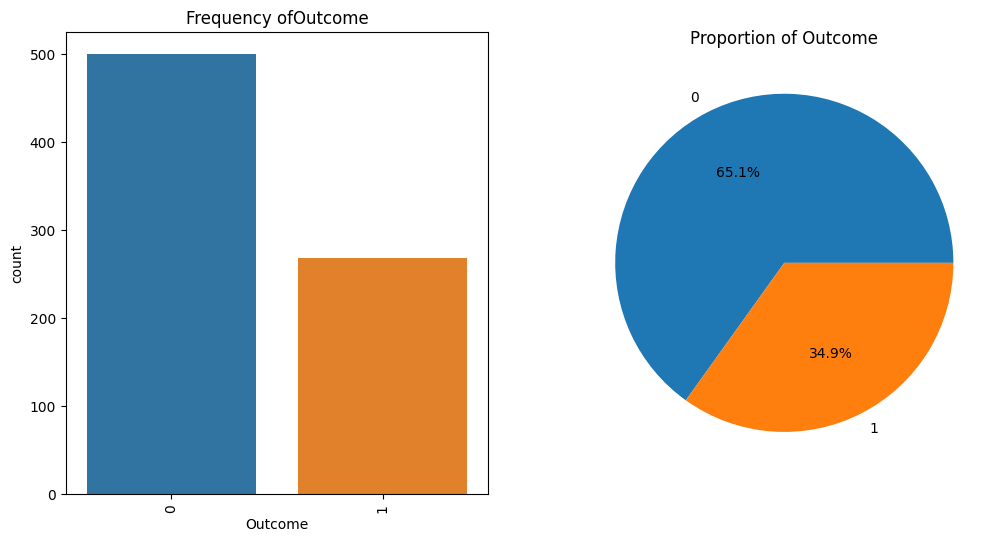

In [5]:
def cat_summary(dataframe , col_name , plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts()/len(df)}))
    print("##########################################")
    if plot:
        fig, axs = plt.subplots(1,2 , figsize=(12,6))
        sns.countplot(x=col_name, data=dataframe, ax=axs[0])
        axs[0].set_title("Frequency of" + col_name)
        axs[0].tick_params(axis='x', rotation=90)
        values= dataframe[col_name].value_counts()
        axs[1].pie(values, labels=values.index, autopct='%1.1f%%')
        axs[1].set_title("Proportion of " + col_name)
        plt.show()

for col in cat_cols:
    cat_summary(df,col, plot =True)
        

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
##########################################


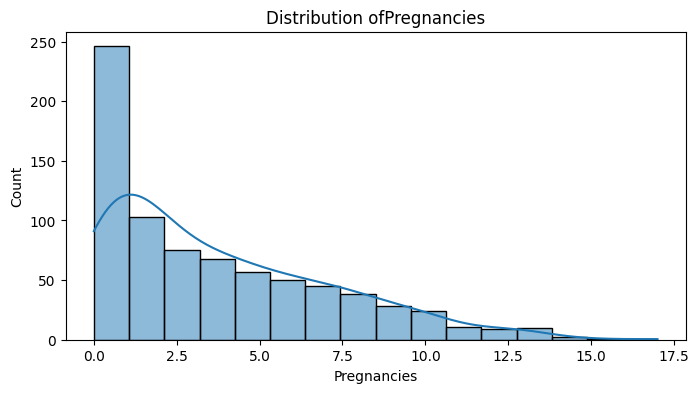

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64
##########################################


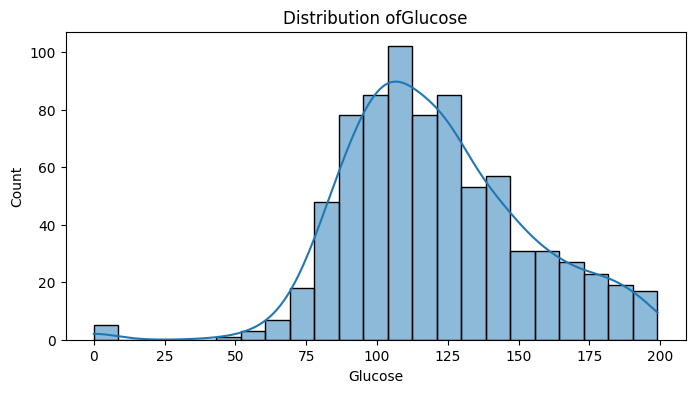

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64
##########################################


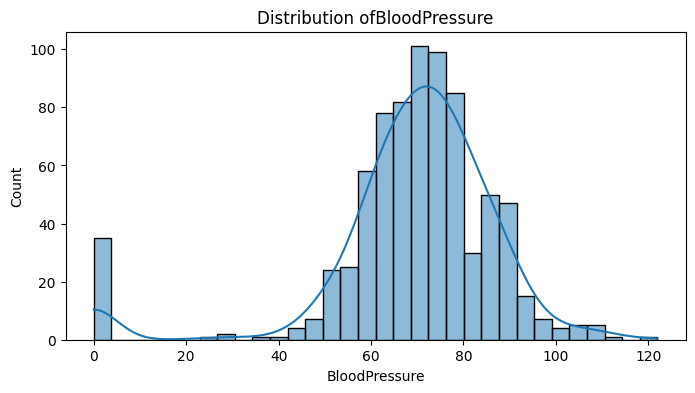

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64
##########################################


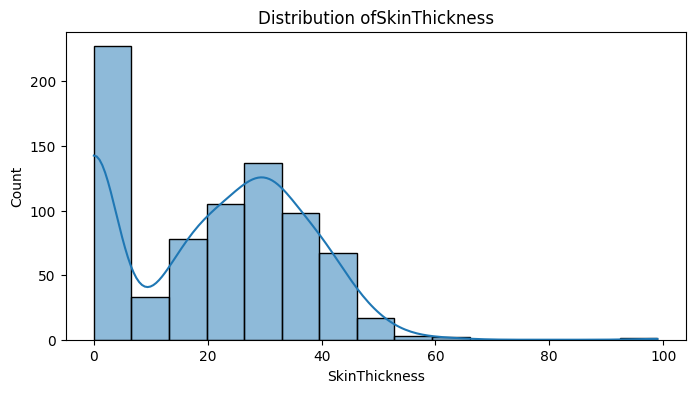

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64
##########################################


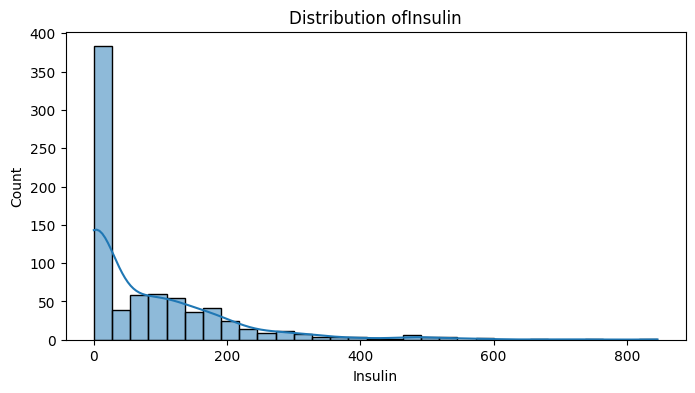

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64
##########################################


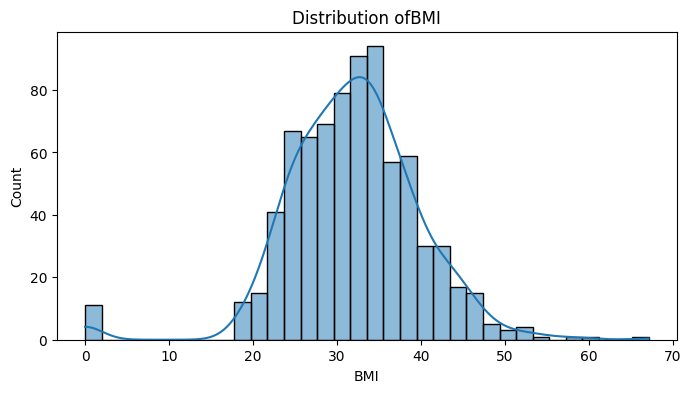

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64
##########################################


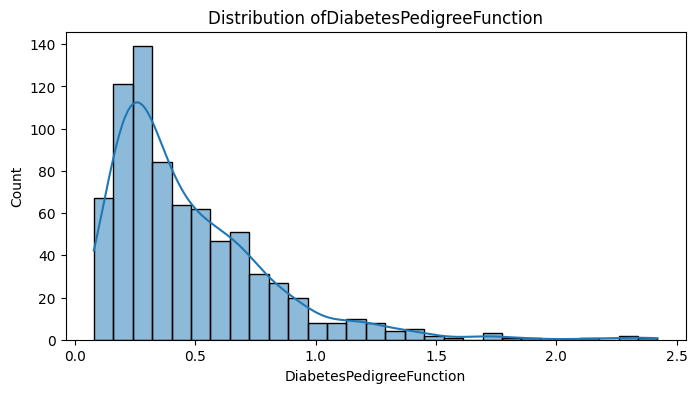

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64
##########################################


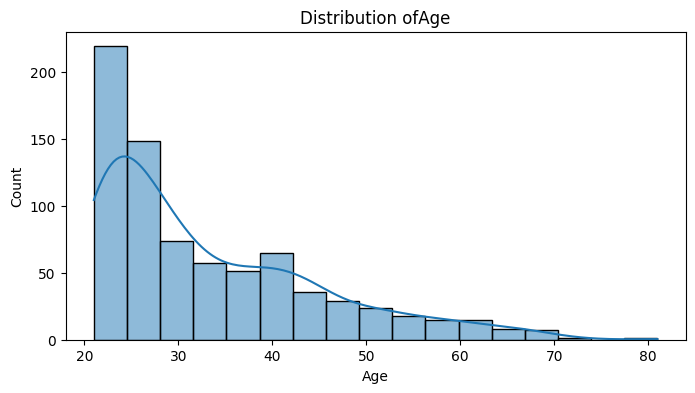

In [6]:
def num_summary(dataframe, col_name , plot=False):
    print(dataframe[col_name].describe())
    print("##########################################")
    if plot:
        plt.figure(figsize=(8,4))
        sns.histplot(dataframe[col_name], kde=True)
        plt.title("Distribution of" + col_name)
        plt.show()
    
for col in num_cols:
    num_summary(df, col, plot=True)

# Graphs of Interaction with the Outcome Variable

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

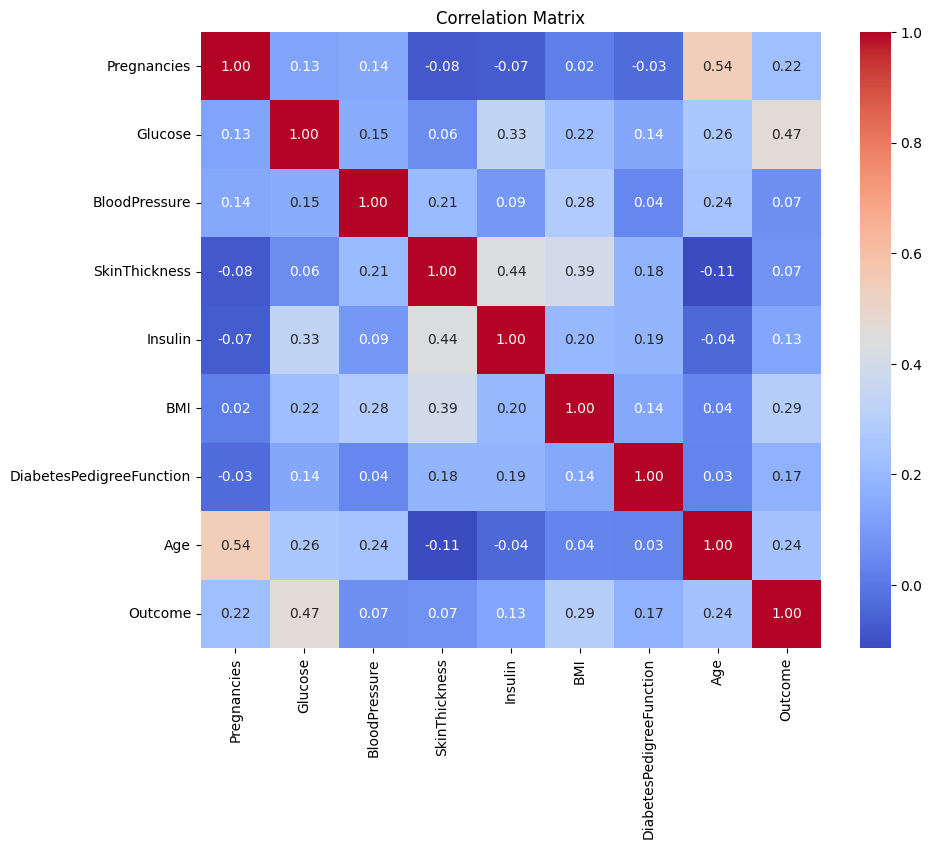

In [7]:
correlation_matrix = df.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))  # Görselin boyutunu ayarla
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Target Variable Analysis

         Outcome      Ratio
Outcome                    
0            500  65.104167
1            268  34.895833
##########################################


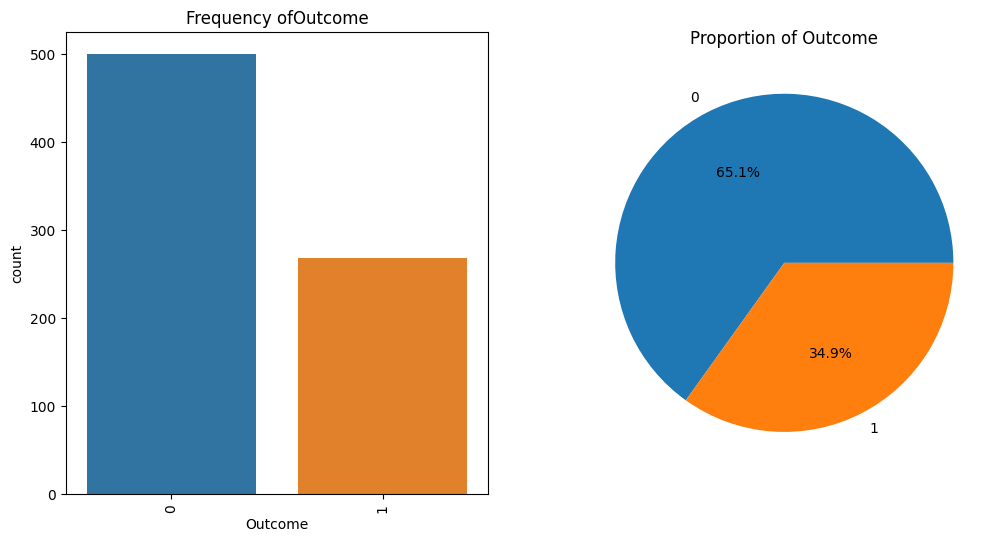

         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


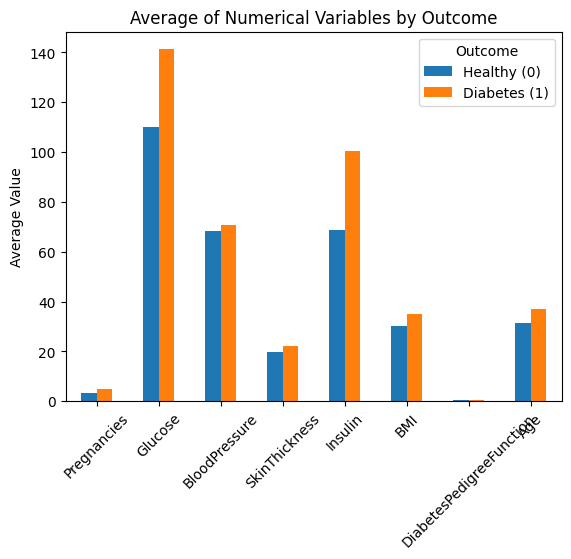

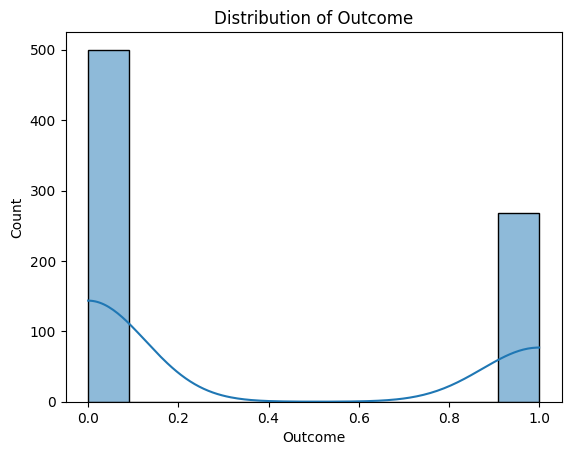

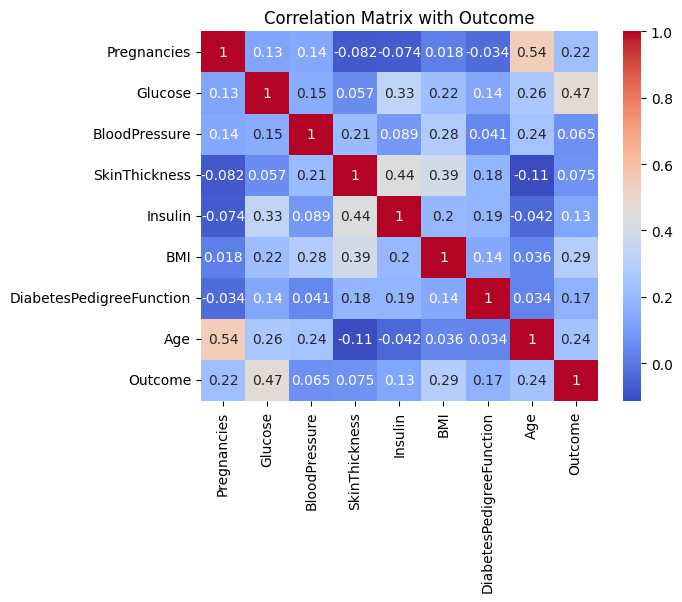

In [8]:
def cat_summary(dataframe , col_name , plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts()/len(df)}))
    print("##########################################")
    if plot:
        fig, axs = plt.subplots(1,2 , figsize=(12,6))
        sns.countplot(x=col_name, data=dataframe, ax=axs[0])
        axs[0].set_title("Frequency of" + col_name)
        axs[0].tick_params(axis='x', rotation=90)
        values= dataframe[col_name].value_counts()
        axs[1].pie(values, labels=values.index, autopct='%1.1f%%')
        axs[1].set_title("Proportion of " + col_name)
        plt.show()

for col in cat_cols:
    cat_summary(df,col, plot =True)

    
    
grouped = df.groupby('Outcome')[num_cols].mean()
print(grouped)

grouped.T.plot(kind='bar')
plt.title('Average of Numerical Variables by Outcome')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Healthy (0)', 'Diabetes (1)'])
plt.show()

sns.histplot(df['Outcome'], kde=True)
plt.title('Distribution of Outcome')
plt.show()


correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Outcome')
plt.show()

# Detection of Outliers

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat : 1
cat_cols : ['Outcome']
num_cols : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
cat_but_car : []


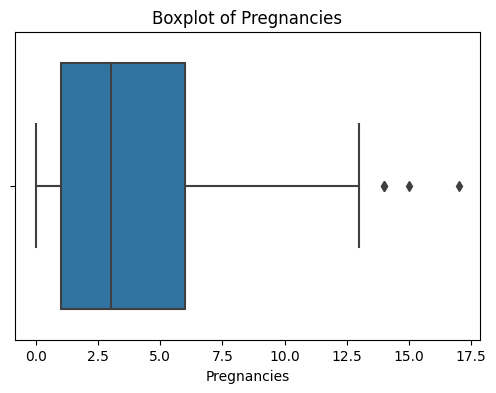

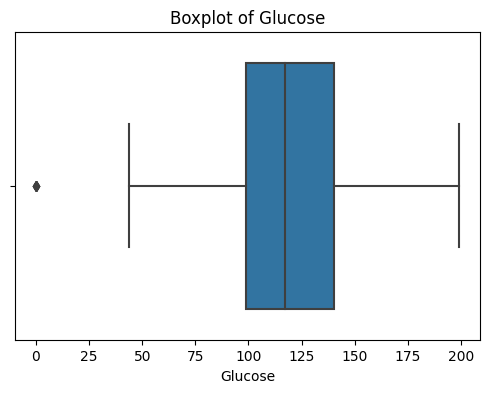

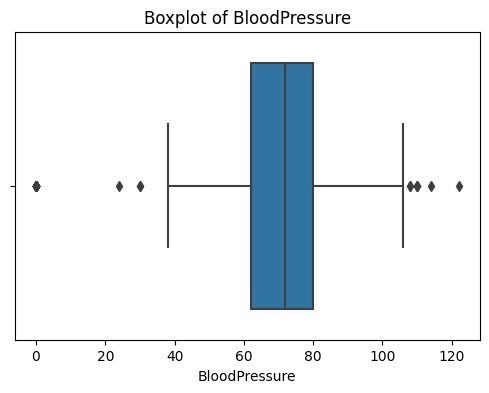

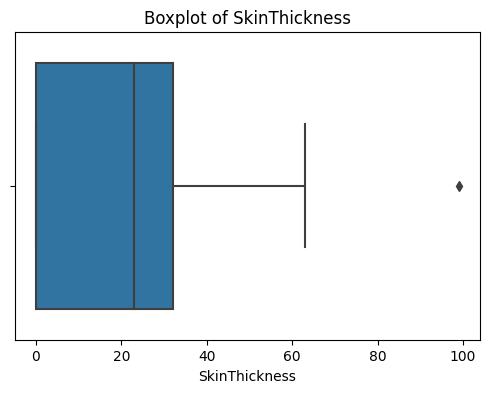

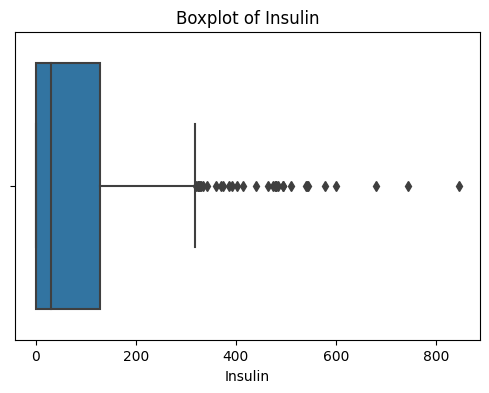

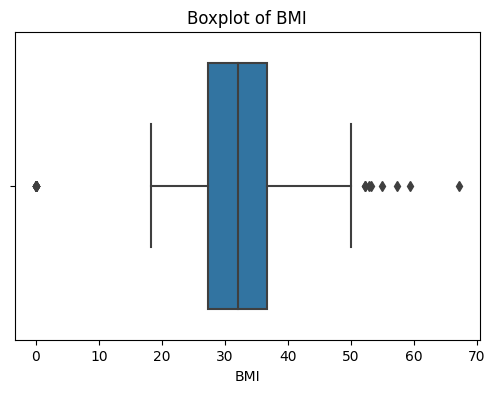

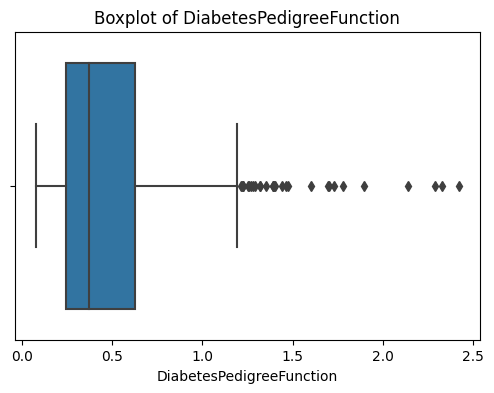

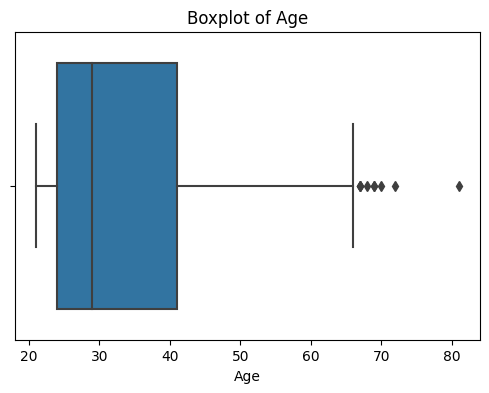

Pregnancies True
Glucose True
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age True


In [9]:


def outlier_thresholds(dataframe,col_name, q1=0.25 , q3 =0.75):
    quantile1 = dataframe[col_name].quantile(q1)
    quantile3 = dataframe[col_name].quantile(q3)
    IQR = quantile3 - quantile1
    up_limit = quantile1 - 1.5 * IQR
    low_limit = quantile3 + 1.5 * IQR
    return up_limit , low_limit



def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name]>up_limit) | (dataframe[col_name]<low_limit) ].any(axis=None):
        return True
    else:
        return False
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O" and col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat : {len(num_but_cat)}")
    print(f"cat_cols : {cat_cols}")
    print(f"num_cols : {num_cols}")
    print(f"cat_but_car : {cat_but_car}")
    
    return cat_cols, num_cols, cat_but_car

cat_cols , num_cols , cat_but_car = grab_col_names(df) 
    
for col in num_cols:
    
        plt.figure(figsize=(6, 4))  
        sns.boxplot(x=df[col])  
        plt.title(f'Boxplot of {col}')  
        plt.show() 
for col in num_cols:
    print(col,check_outlier(df,col))
    
def grab_outliers (dataframe, col_name, index=False):
    low_limit, up_limit = outliers_thresholds(dataframe,col_name)
    


# Missing Values Analysis

               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
Columns with missing values: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65
                 TARGET_MEAN  Count
Glucose_NA_FLAG                    
0                   0.348624    763
1                   0.400000      5


                       TARGET_MEAN  Count
BloodPressure_NA_FLAG                    
0                         0.343793    733
1                         0.457143     35


                       TARGET_MEAN  Count
SkinThickness_NA_FLAG      

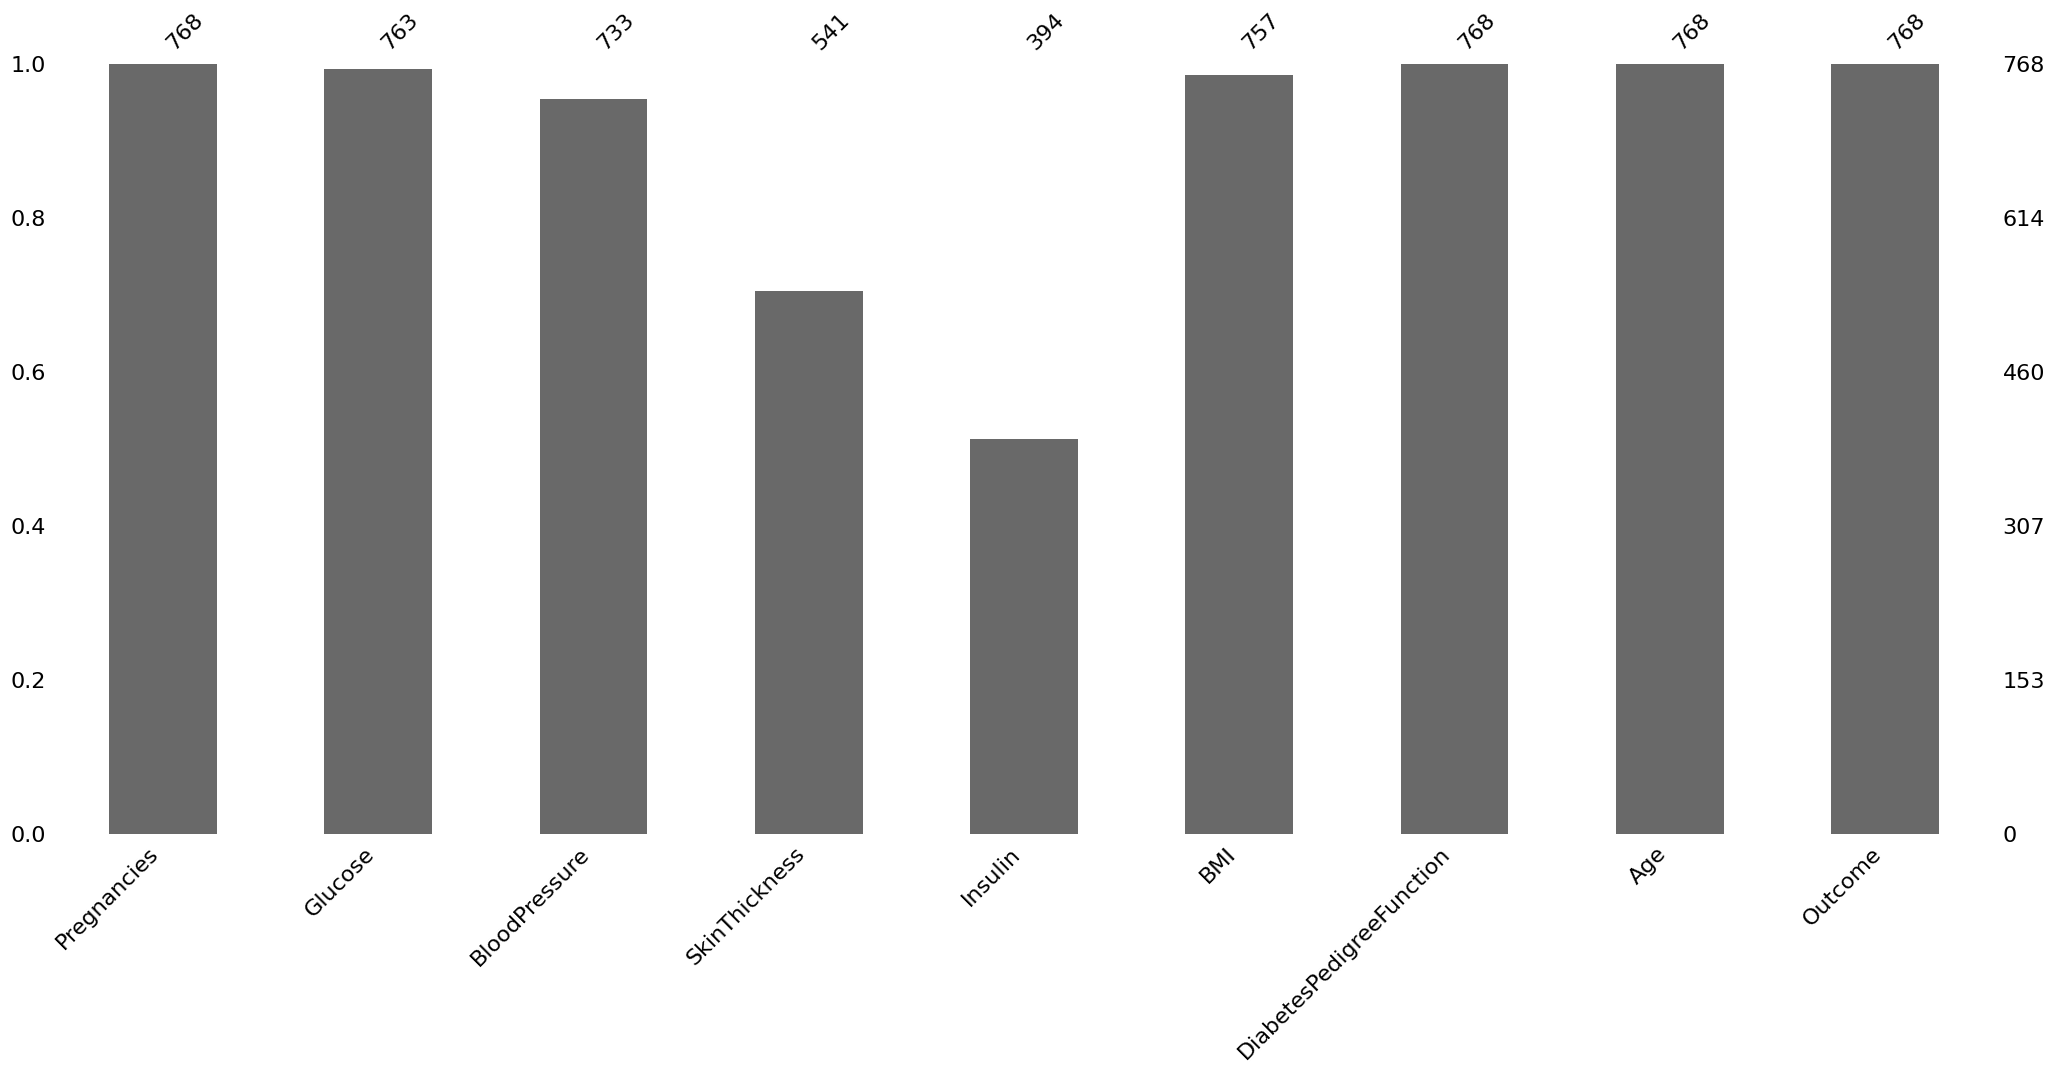

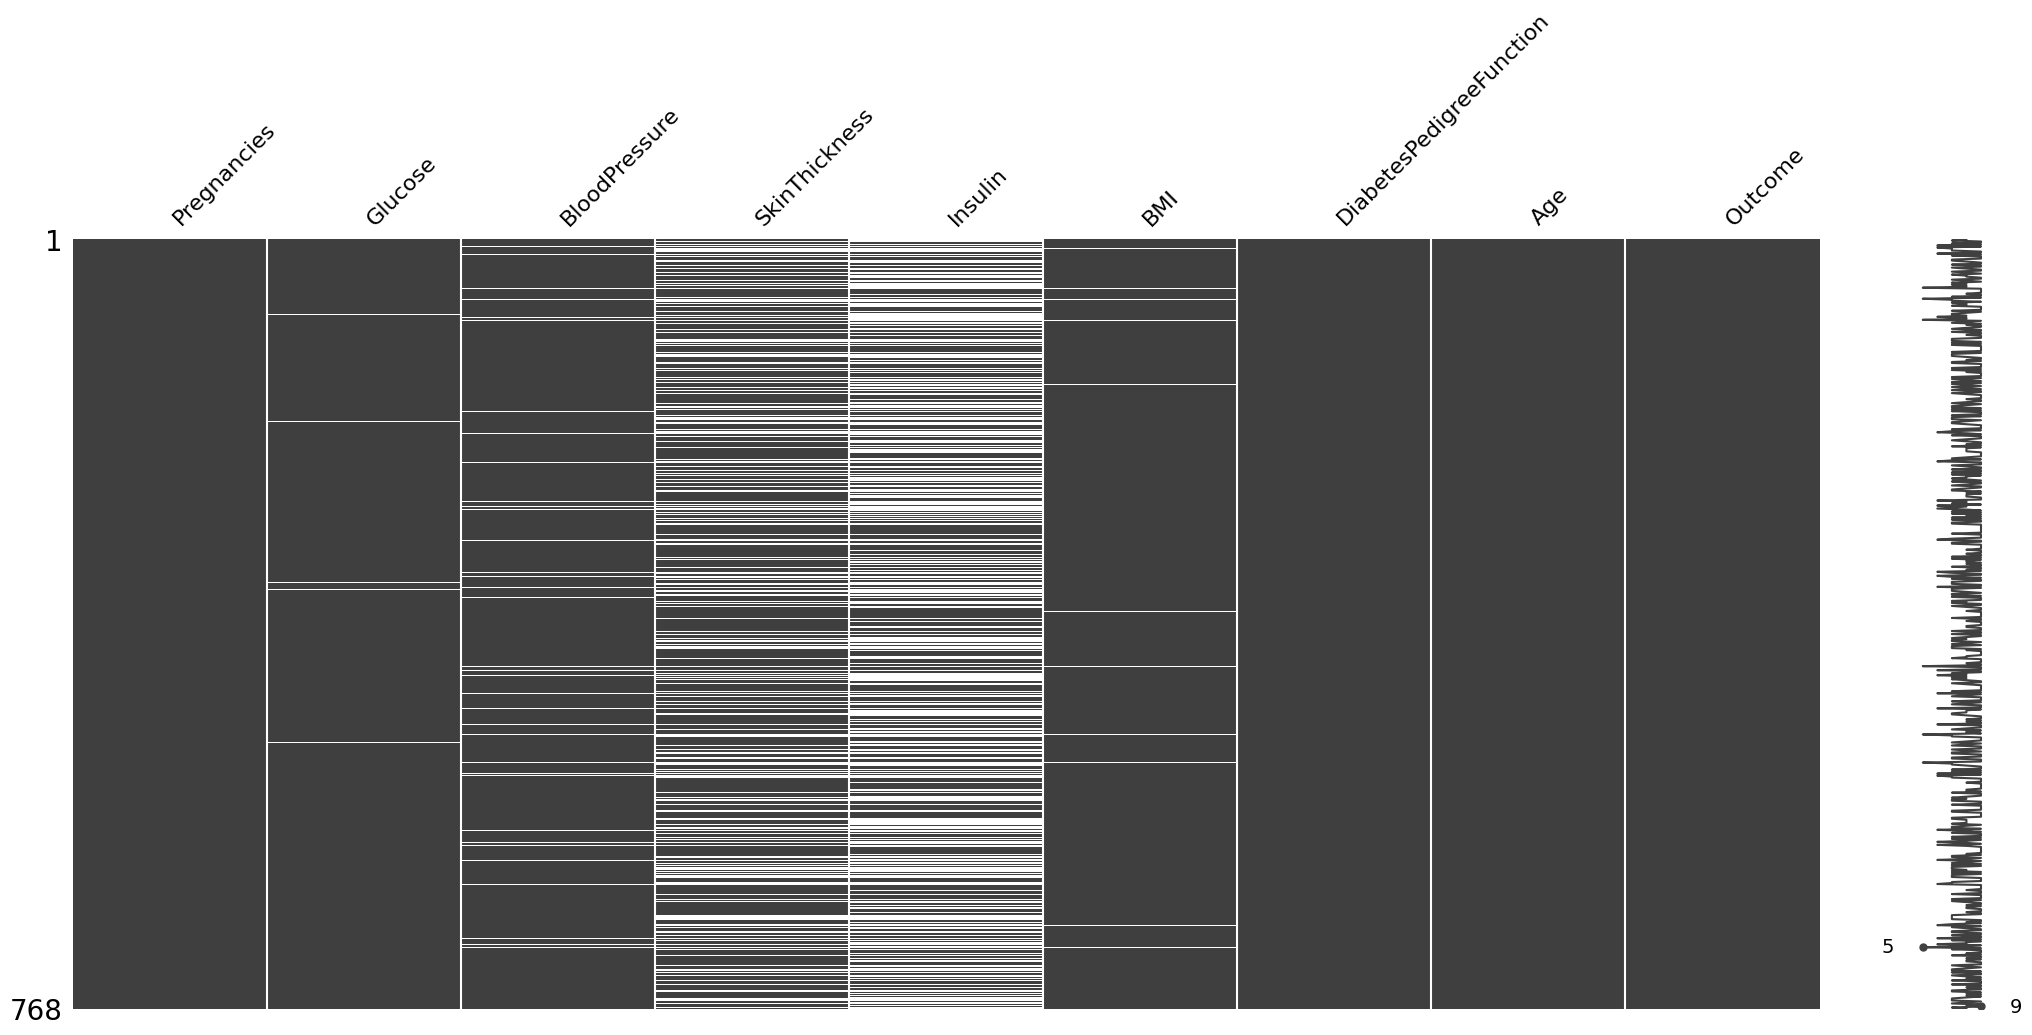

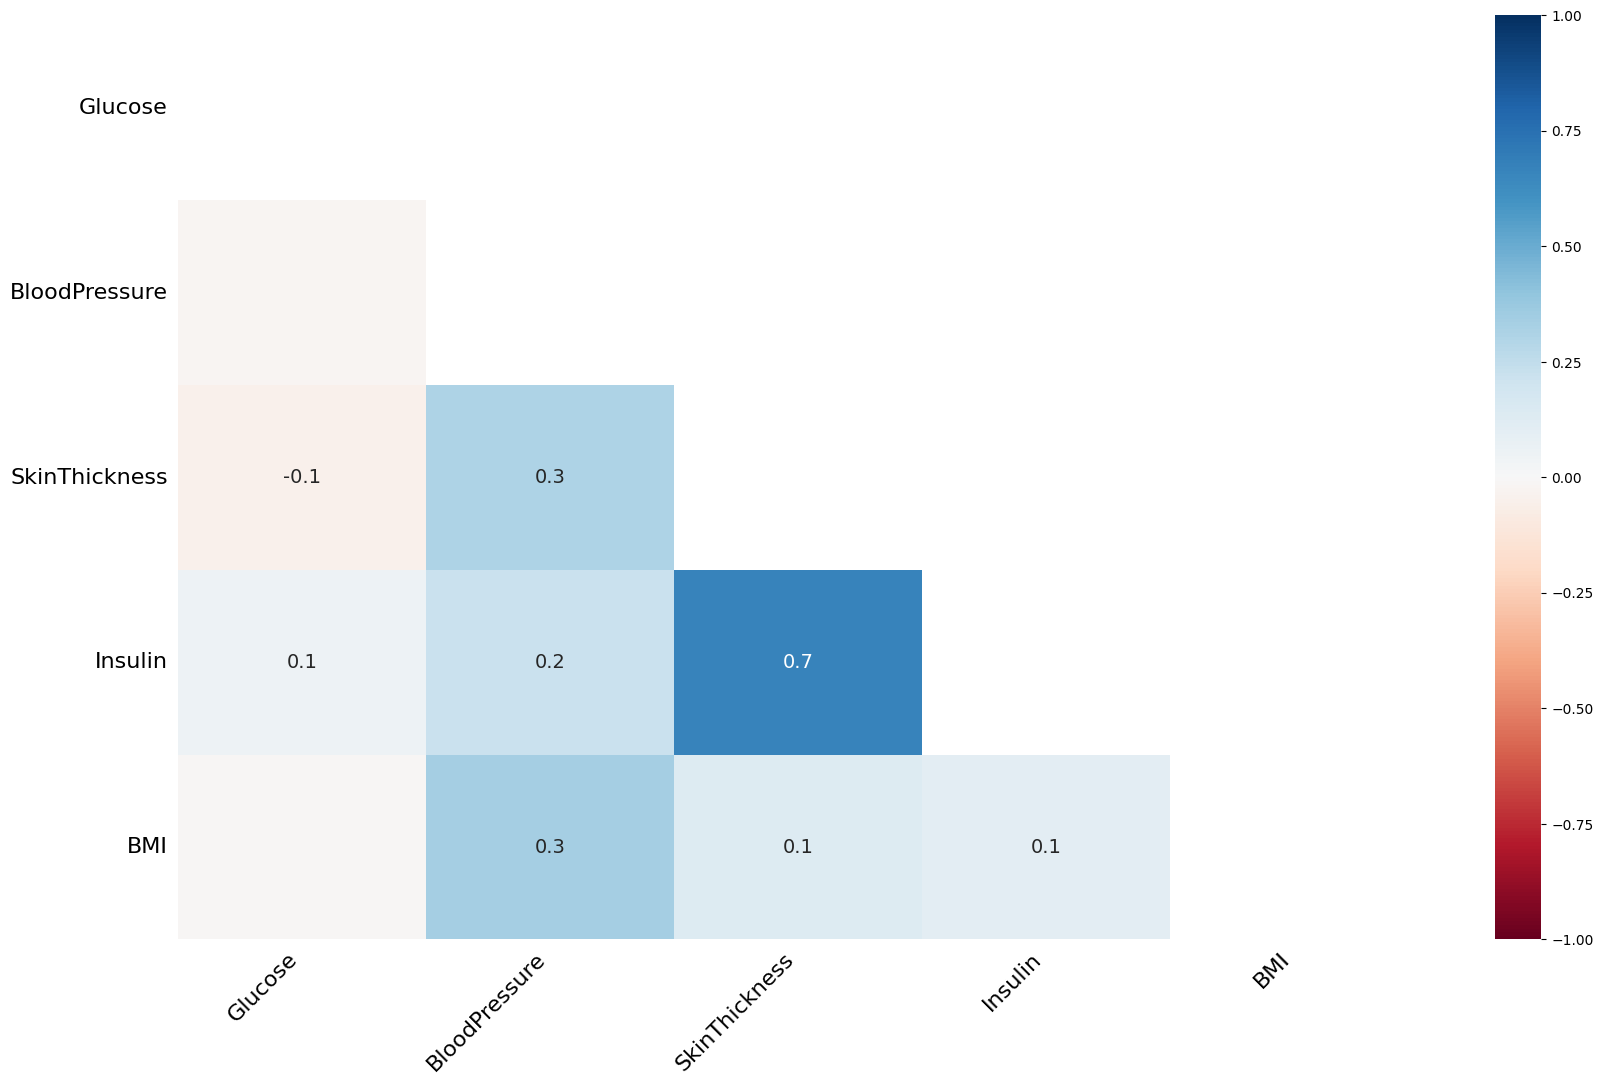

In [10]:



min_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[min_zero_cols] = df[min_zero_cols].replace(0, np.nan)




def missing_values_table(dataframe, na_name=True):
    na_columns = [col for col in dataframe if dataframe[col].isnull().sum()>0]
    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["n_miss", "ratio"])
    print(missing_df)
    if na_name:
        return na_columns
missing_columns = missing_values_table(df)
print("Columns with missing values:", missing_columns)

missing_values_table(df, True)
na_cols = missing_values_table(df, True)

def missing_vs_target(dataframe, target , na_columns):
    na_columns = [col for col in dataframe if dataframe[col].isnull().sum()>0]
    temp_df= dataframe.copy()
    for col in na_columns:
        temp_df[col+'_NA_FLAG']=np.where(temp_df[col].isnull(),1,0)
    na_flags=temp_df.loc[:,temp_df.columns.str.contains("_NA_")].columns
    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),"Count":temp_df.groupby(col)[target].count()}), end="\n\n\n")
missing_vs_target(df,"Outcome",na_cols)

msno.bar(df)
plt.show()

msno.matrix(df)
plt.show()

msno.heatmap(df)
plt.show()



# Analysis of Variable Correlations

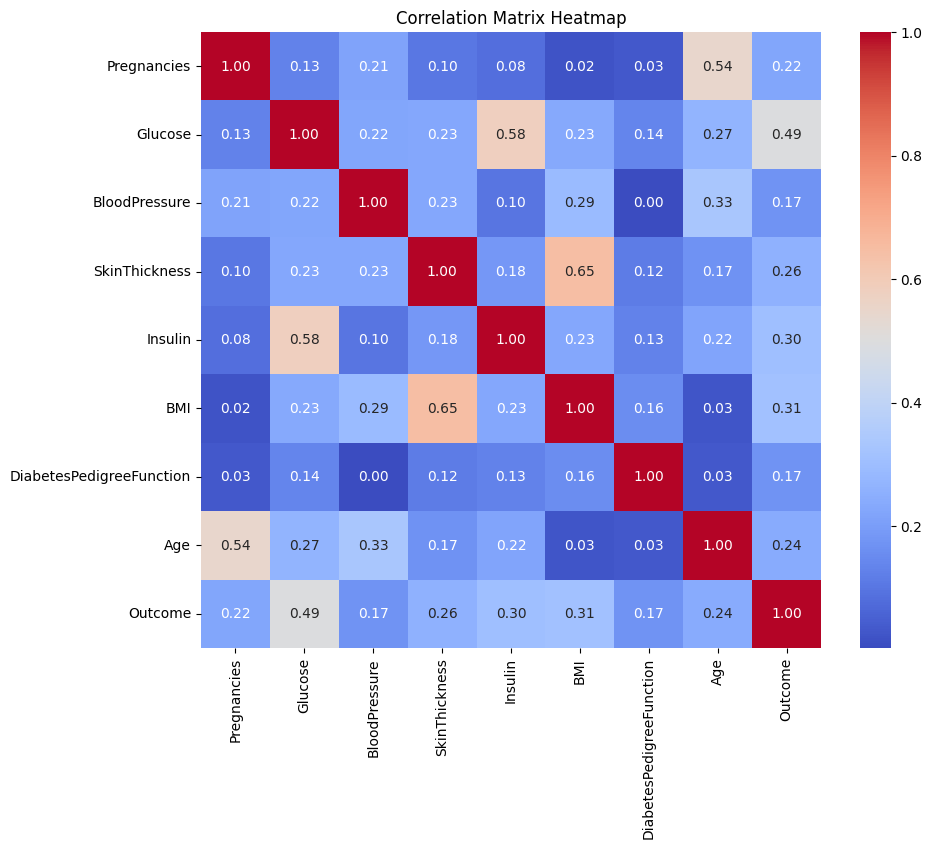

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [11]:
def identify_high_correlated_columns(dataframe, threshold=0.90, show_plot=False):
    correlation_matrix = dataframe.corr(numeric_only=True).abs()
    upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    if show_plot:
        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Matrix Heatmap')
        plt.show()

    return to_drop
identify_high_correlated_columns(df,threshold=0.90, show_plot=True)

df.describe().T

# Handling Missing and Outlier Values

In [12]:
min_zero_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

df[min_zero_cols] = df[min_zero_cols].replace(0, np.nan)
def replace_zeros_with_nan(dataframe, columns):
    df = dataframe.copy()
    for column in columns:
        df[column] = df[column].replace(0, np.nan)
    return df
df = replace_zeros_with_nan(df, min_zero_cols)
def impute_missing_values(dataframe, strategy='mean'):
    imputer = SimpleImputer(strategy=strategy)
    dataframe_imputed = pd.DataFrame(imputer.fit_transform(dataframe), columns=dataframe.columns)
    return dataframe_imputed

impute_missing_values(df, strategy='mean')

df = impute_missing_values(df, strategy='mean')

        
df.describe().T





,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [13]:


def fill_categorical_with_mode(dataframe):
    for column in cat_cols:
        mode_value = dataframe[column].mode()[0]
        dataframe[column] = dataframe[column].fillna(mode_value)
    return dataframe   

fill_categorical_with_mode(df)

df= fill_categorical_with_mode(df)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [14]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
for col in df.columns:
    replace_with_thresholds(df,col)
    
print(df.head())
df.describe().T

    


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0       35.00000  155.548223  33.6   
1          1.0     85.0           66.0       29.00000  155.548223  26.6   
2          8.0    183.0           64.0       29.15342  155.548223  23.3   
3          1.0     89.0           66.0       23.00000   94.000000  28.1   
4          0.0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  
3                     0.167  21.0      0.0  
4                     1.200  33.0      1.0  


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.837240,3.344157,0.000000,1.00000,3.000000,6.000000,13.500000
Glucose,768.0,121.686763,30.435949,44.000000,99.75000,117.000000,140.250000,199.000000
BloodPressure,768.0,72.376538,11.696836,40.000000,64.00000,72.202592,80.000000,104.000000
SkinThickness,768.0,28.911883,7.443497,14.500000,25.00000,29.153420,32.000000,42.500000
Insulin,768.0,143.937487,39.496793,70.427665,121.50000,155.548223,155.548223,206.620558
BMI,768.0,32.395615,6.667466,18.200000,27.50000,32.400000,36.600000,50.250000
DiabetesPedigreeFunction,768.0,0.458914,0.285596,0.078000,0.24375,0.372500,0.626250,1.200000
Age,768.0,33.199870,11.628404,21.000000,24.00000,29.000000,41.000000,66.500000
Outcome,768.0,0.348958,0.476951,0.000000,0.00000,0.000000,1.000000,1.000000


# Feature Engineering

In [15]:
def create_features(dataframe):
    bins = [0, 18.5, 24.9, 29.9, np.inf]
    labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
    dataframe['BMI_Category'] = pd.cut(dataframe['BMI'], bins=bins, labels=labels)
    dataframe['Insulin_BMI_Interaction'] = dataframe['Insulin'] * dataframe['BMI']
    age_bins = [-np.inf, 40, np.inf] 
    age_labels = ['<40', '40+']
    dataframe['Age_Category'] = pd.cut(dataframe['Age'], bins=age_bins, labels=age_labels)
    dataframe['Pedigree_Age_Product'] = dataframe['DiabetesPedigreeFunction'] * dataframe['Age']
    return dataframe
df = create_features(df)
print(df.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0       35.00000  155.548223  33.6   
1          1.0     85.0           66.0       29.00000  155.548223  26.6   
2          8.0    183.0           64.0       29.15342  155.548223  23.3   
3          1.0     89.0           66.0       23.00000   94.000000  28.1   
4          0.0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome BMI_Category  \
0                     0.627  50.0      1.0        Obese   
1                     0.351  31.0      0.0   Overweight   
2                     0.672  32.0      1.0       Normal   
3                     0.167  21.0      0.0   Overweight   
4                     1.200  33.0      1.0        Obese   

   Insulin_BMI_Interaction Age_Category  Pedigree_Age_Product  
0              5226.420305          40+                31.350  
1              4137.582741          <40                10.881  
2 

# Label Encoding

In [16]:
def fill_categorical_with_mode(dataframe):
    for column in cat_cols:
        mode_value = dataframe[column].mode()[0]
        dataframe[column] = dataframe[column].fillna(mode_value)
    return dataframe   

fill_categorical_with_mode(df)

df= fill_categorical_with_mode(df)




def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtype == "category"
               and df[col].nunique() == 2]

for col in binary_cols:
    df = label_encoder(df, col)
print(df.head())




   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0       35.00000  155.548223  33.6   
1          1.0     85.0           66.0       29.00000  155.548223  26.6   
2          8.0    183.0           64.0       29.15342  155.548223  23.3   
3          1.0     89.0           66.0       23.00000   94.000000  28.1   
4          0.0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome BMI_Category  \
0                     0.627  50.0      1.0        Obese   
1                     0.351  31.0      0.0   Overweight   
2                     0.672  32.0      1.0       Normal   
3                     0.167  21.0      0.0   Overweight   
4                     1.200  33.0      1.0        Obese   

   Insulin_BMI_Interaction  Age_Category  Pedigree_Age_Product  
0              5226.420305             0                31.350  
1              4137.582741             1                10.881  

# One Hot Encoding

In [17]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0       35.00000  155.548223  33.6   
1          1.0     85.0           66.0       29.00000  155.548223  26.6   
2          8.0    183.0           64.0       29.15342  155.548223  23.3   
3          1.0     89.0           66.0       23.00000   94.000000  28.1   
4          0.0    137.0           40.0       35.00000  168.000000  43.1   

   DiabetesPedigreeFunction   Age  Outcome  Insulin_BMI_Interaction  \
0                     0.627  50.0      1.0              5226.420305   
1                     0.351  31.0      0.0              4137.582741   
2                     0.672  32.0      1.0              3624.273604   
3                     0.167  21.0      0.0              2641.400000   
4                     1.200  33.0      1.0              7240.800000   

   Age_Category  Pedigree_Age_Product  BMI_Category_Underweight  \
0             0                31.350                  

# Standardization

In [18]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(random_state=46)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred, digits=4)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8239    0.7748    0.7986       151
         1.0     0.6180    0.6875    0.6509        80

    accuracy                         0.7446       231
   macro avg     0.7210    0.7312    0.7248       231
weighted avg     0.7526    0.7446    0.7475       231

ROC AUC Score: 0.8028


In [19]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O" and col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat : {len(num_but_cat)}")
    print(f"cat_cols : {cat_cols}")
    print(f"num_cols : {num_cols}")
    print(f"cat_but_car : {cat_but_car}")
    
    return cat_cols, num_cols, cat_but_car




scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print(df.head())




   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.647150  0.865108      -0.032212       0.818444  0.294158  0.180754   
1    -0.848970 -1.206162      -0.545506       0.011846  0.294158 -0.869804   
2     1.245598  2.015813      -0.716604       0.032470  0.294158 -1.365068   
3    -0.848970 -1.074652      -0.545506      -0.794752 -1.265167 -0.644685   
4    -1.148194  0.503458      -2.769778       0.818444  0.609624  1.606512   

   DiabetesPedigreeFunction       Age  Outcome  Insulin_BMI_Interaction  \
0                  0.588927  1.445691      1.0              5226.420305   
1                 -0.378101 -0.189304      0.0              4137.582741   
2                  0.746595 -0.103252      1.0              3624.273604   
3                 -1.022787 -1.049828      0.0              2641.400000   
4                  2.596563 -0.017199      1.0              7240.800000   

   Age_Category  Pedigree_Age_Product  BMI_Category_Underweight  \
0            

# ML Model

In [20]:
y = df["Outcome"]  
X = df.drop(["Outcome"], axis=1) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
rf_model = RandomForestClassifier(random_state=46)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred, digits=4)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print("Classification Report:")
print(report)
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

         0.0     0.8182    0.7748    0.7959       151
         1.0     0.6136    0.6750    0.6429        80

    accuracy                         0.7403       231
   macro avg     0.7159    0.7249    0.7194       231
weighted avg     0.7473    0.7403    0.7429       231

ROC AUC Score: 0.8022
